In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')





In [7]:
df = pd.read_csv('student.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [10]:
print("Categories in gender variables: ", end=" ")
print(df['gender'].unique())
print("Categories in race variables: ", end=" ")
print(df['race/ethnicity'].unique())
print("Categories in lunch variables: ", end=" ")
print(df['lunch'].unique())
print("Categories in test preparation course variables: ", end=" ")
print(df['test preparation course'].unique())
print("Categories in parental level of education variables: ", end=" ")
print(df['parental level of education'].unique())

Categories in gender variables:  ['female' 'male']
Categories in race variables:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in lunch variables:  ['standard' 'free/reduced']
Categories in test preparation course variables:  ['none' 'completed']
Categories in parental level of education variables:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


In [11]:
numeric = [feature for feature in df.columns if df[feature].dtype != 'O']
category = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Numeric features are:', numeric)
print('Categorical features are: ', category)

Numeric features are: ['math score', 'reading score', 'writing score']
Categorical features are:  ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [12]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
df['total'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total'] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
math_full = df[df['math score'] == 100]['average'].count()
reading_full = df[df['reading score']== 100]['average'].count()
writing_full = df[df['writing score']== 100]['average'].count()
print(f'Number of students with full marks in math {math_full}')
print(f'Number of students with full marks in reading {reading_full}')
print(f'Number of students with full marks in writing {writing_full}')


Number of students with full marks in math 7
Number of students with full marks in reading 17
Number of students with full marks in writing 14


In [16]:
math_less_20 = df[df['math score'] < 20]['average'].count()
reading_less_20 = df[df['reading score'] < 20]['average'].count()
writing_less_20 = df[df['writing score'] < 20]['average'].count()
print(f'Number of students less than 20 marks in math {math_less_20}')
print(f'Number of students less than 20 marks in reading {reading_less_20}')
print(f'Number of students less than 20 marks in writing {writing_less_20}')

Number of students less than 20 marks in math 4
Number of students less than 20 marks in reading 1
Number of students less than 20 marks in writing 3


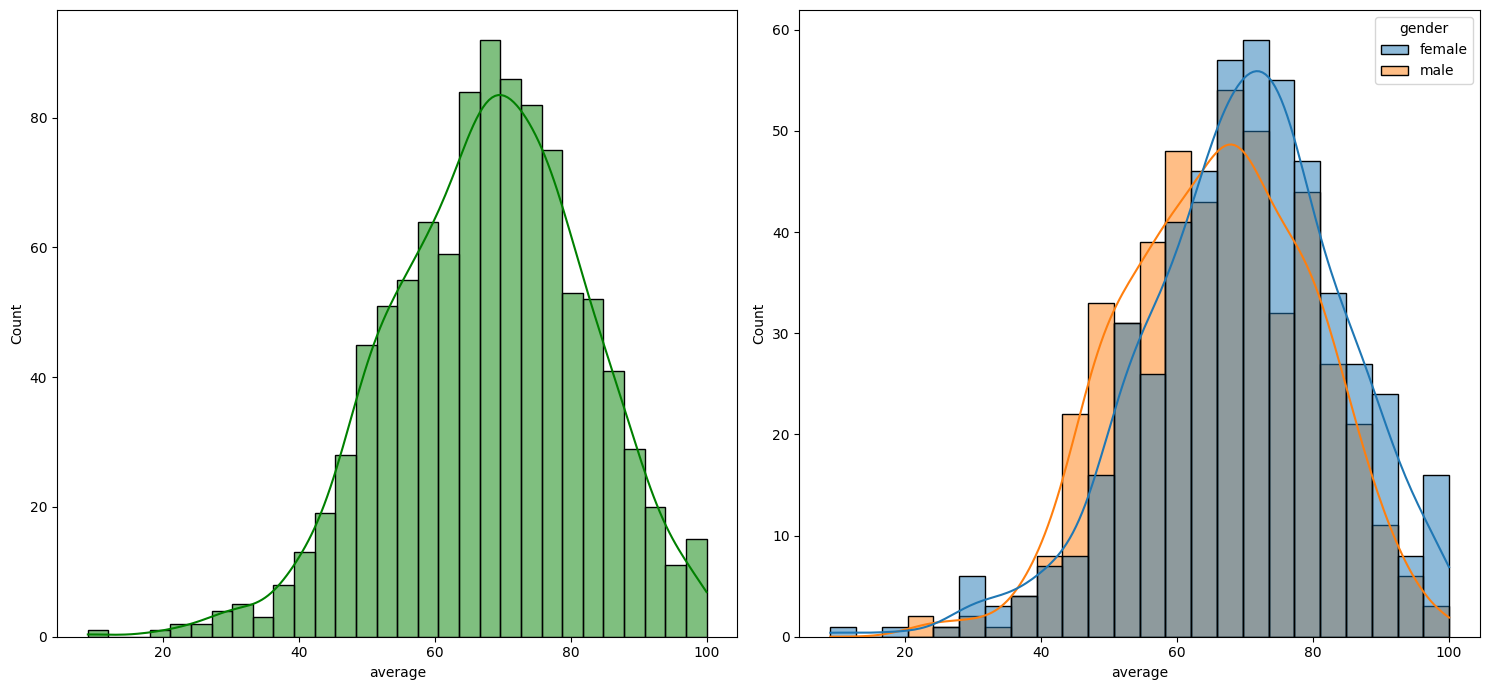

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# First subplot
sns.histplot(data=df, x='average', bins=30, kde=True, color='g', ax=axs[0])

# Second subplot
sns.histplot(data=df, x='average', kde=True, hue='gender', ax=axs[1])

plt.tight_layout()
plt.show()

<Axes: xlabel='average', ylabel='Count'>

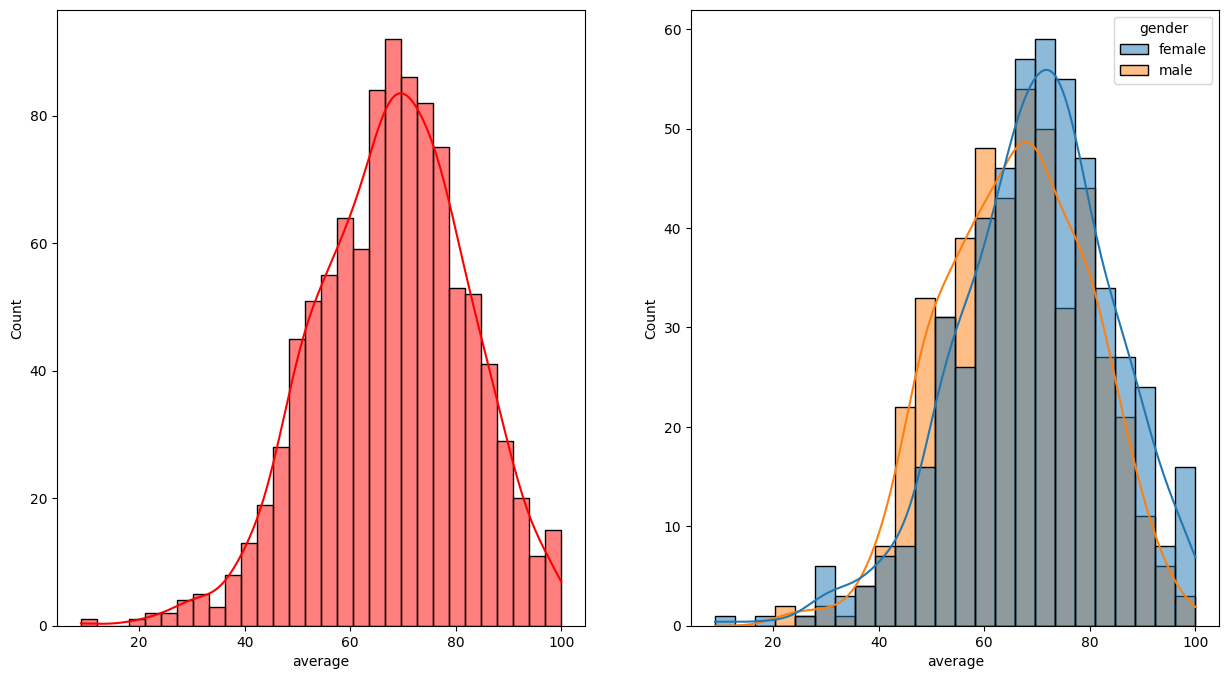

In [18]:
fig, axs = plt.subplots(1, 2, figsize = (15, 8))
plt.subplot(121)
sns.histplot(data = df, x = 'average', bins = 30, kde = True, color='r')
plt.subplot(122)
sns.histplot(data = df, x = 'average', kde = True, hue= 'gender')


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRFRegressor
import warnings



In [20]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [21]:
df = df.drop(['total', 'average'], axis = 1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [22]:
X = df.drop('math score', axis = 1)
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [23]:
y = df['math score']
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

In [24]:
numeric_features = X.select_dtypes(exclude='object').columns
category_features = X.select_dtypes(include='object').columns
print('Numerical features are: ', numeric_features)
print('Categorical features are: ', category_features)

Numerical features are:  Index(['reading score', 'writing score'], dtype='object')
Categorical features are:  Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')


In [25]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
scaler = StandardScaler()
ohe = OneHotEncoder()
ctm = ColumnTransformer(
    [
       ("OneHotEncoder", ohe, category_features),
        ("StandardScaler", scaler, numeric_features)
    ])

X = ctm.fit_transform(X)
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [26]:
X.shape

(1000, 19)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=101)
y_test.shape

(200,)

In [28]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2 = r2_score(true, predicted)
    return mae, mse, rmse, r2

In [29]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "AdaBoostRegressor": AdaBoostRegressor(),
    "Xgboost": XGBRFRegressor()
}

model_list = []
r2_list = []
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
   

    print(list(models.keys())[i])
    model_list.append((list(models.keys())[i]))

    print('Result for training set:')
    print('Model train mae:', model_train_mae)
    print('Model train mse:', model_train_mse)
    print('Model train rmse:', model_train_rmse)
    print('Model train r2:', model_train_r2)
    print('-------------------')
    print('Result for test set:')
    print('Model test mae:', model_test_mae)
    print('Model test mse:', model_test_mse)
    print('Model test rmse:', model_test_rmse)
    print('Model test r2:', model_test_r2)
    r2_list.append(model_test_r2)
    




LinearRegression
Result for training set:
Model train mae: 4.27875
Model train mse: 28.9055859375
Model train rmse: 5.376391534988872
Model train r2: 0.8785351666400215
-------------------
Result for test set:
Model test mae: 4.315
Model test mse: 28.53234375
Model test rmse: 5.341567536781689
Model test r2: 0.8547898429945544
Ridge
Result for training set:
Model train mae: 4.242879407112199
Model train mse: 28.427025395171032
Model train rmse: 5.331700047374293
Model train r2: 0.8805461369989112
-------------------
Result for test set:
Model test mae: 4.286218757180509
Model test mse: 28.65133621553027
Model test rmse: 5.3526942949817595
Model test r2: 0.8541842525546833
Lasso
Result for training set:
Model train mae: 5.161711928551974
Model train mse: 42.87732938841482
Model train rmse: 6.5480782973644125
Model train r2: 0.8198241793006478
-------------------
Result for test set:
Model test mae: 4.713262108598748
Model test mse: 34.92474706660839
Model test rmse: 5.909716327084439
Mo

In [30]:
pd.DataFrame(list(zip(model_list, r2_list)), columns= ['Model_name', 'R2_score']).sort_values(by = ['R2_score'], ascending= False)

,Model_name,R2_score
0,LinearRegression,0.854790
1,Ridge,0.854184
5,RandomForestRegressor,0.830653
6,AdaBoostRegressor,0.825123
7,Xgboost,0.824297
2,Lasso,0.822257
3,KNeighborsRegressor,0.794185
4,DecisionTreeRegressor,0.696168
